# Predicting heart disease using machine learning 

## Problem Definition
- Using clinical data to predict they'll get heart disease or not 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
#plot to appear inside the notebook

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
df = pd.read_csv('heart-disease.csv')
df.shape #rows and column

(303, 14)

## data exploration 
- to find more about data 
- what kind of data we're working with 
- what things to solve
- whats missing from data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

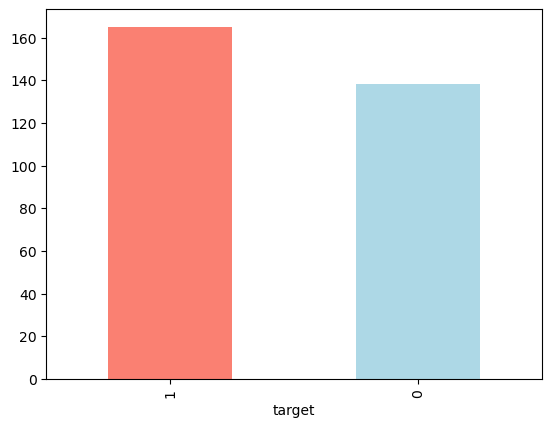

In [6]:
df['target'].value_counts().plot(kind='bar', color= ['salmon', 'lightblue']);
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


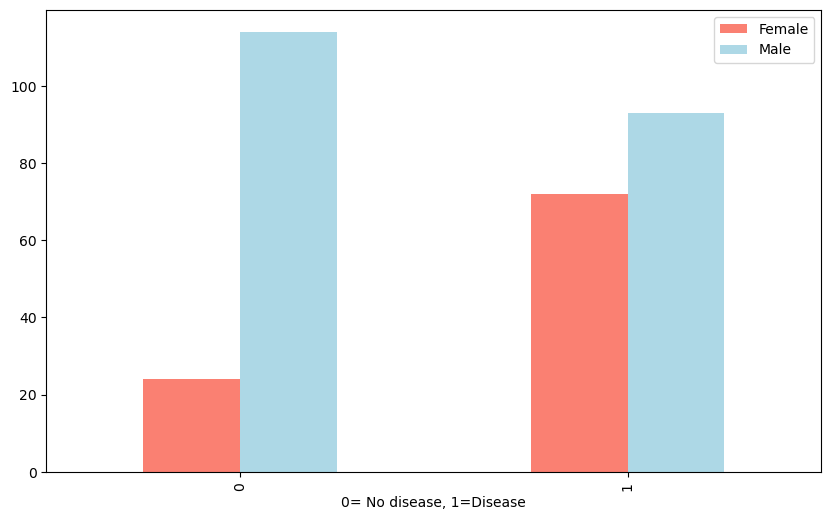

In [11]:
pd.crosstab(df.target, df.sex).plot(kind= 'bar', figsize= (10,6), color = ['salmon', 'lightblue'])
plt.legend(['Female', "Male"])
plt.xlabel('0= No disease, 1=Disease')
plt.show()

## Age vs max heart rate,

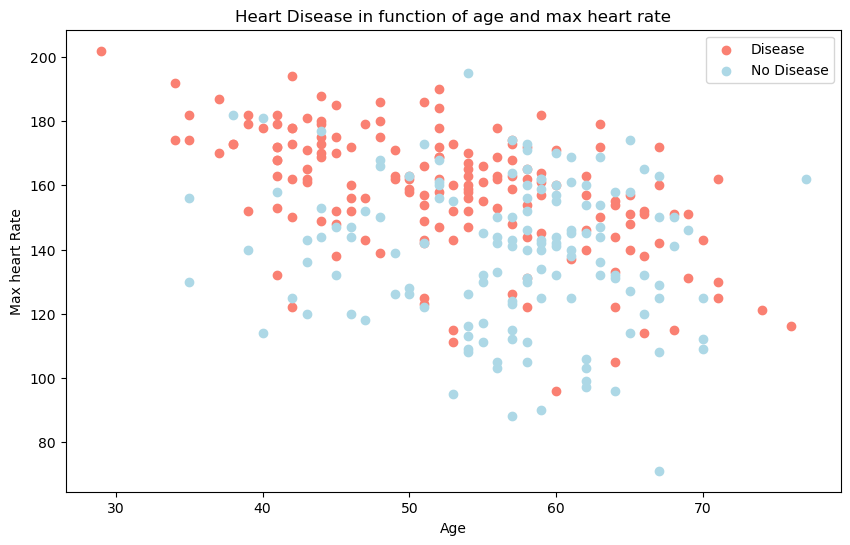

In [12]:
# create another figure 
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

#scatter with negative examples 
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

plt.title('Heart Disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show();

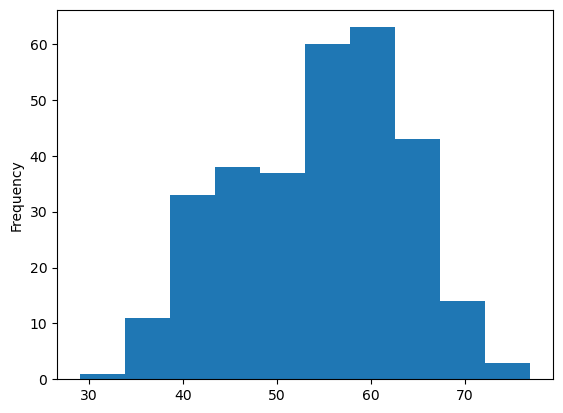

In [13]:
##distribution 
df.age.plot.hist()
plt.show();

In [14]:
pd.crosstab(df.cp , df.target) 

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


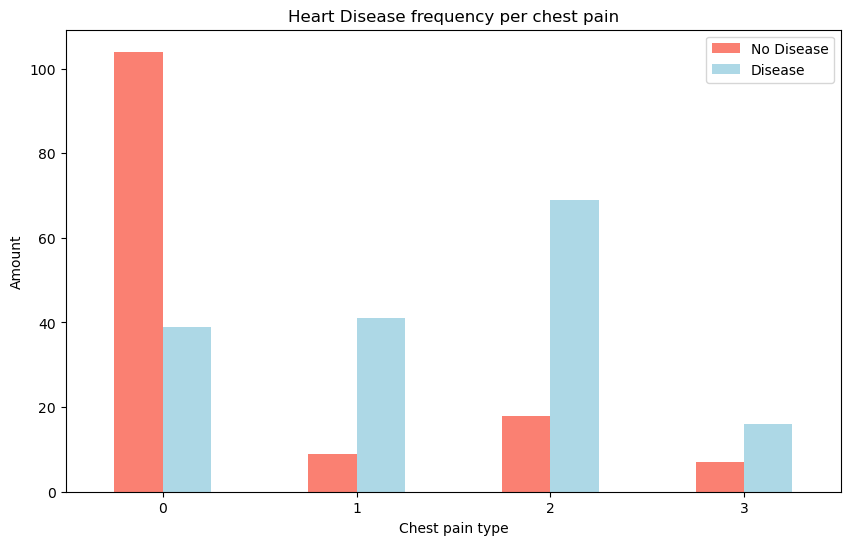

In [15]:
pd.crosstab(df.cp , df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])

plt.title('Heart Disease frequency per chest pain')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


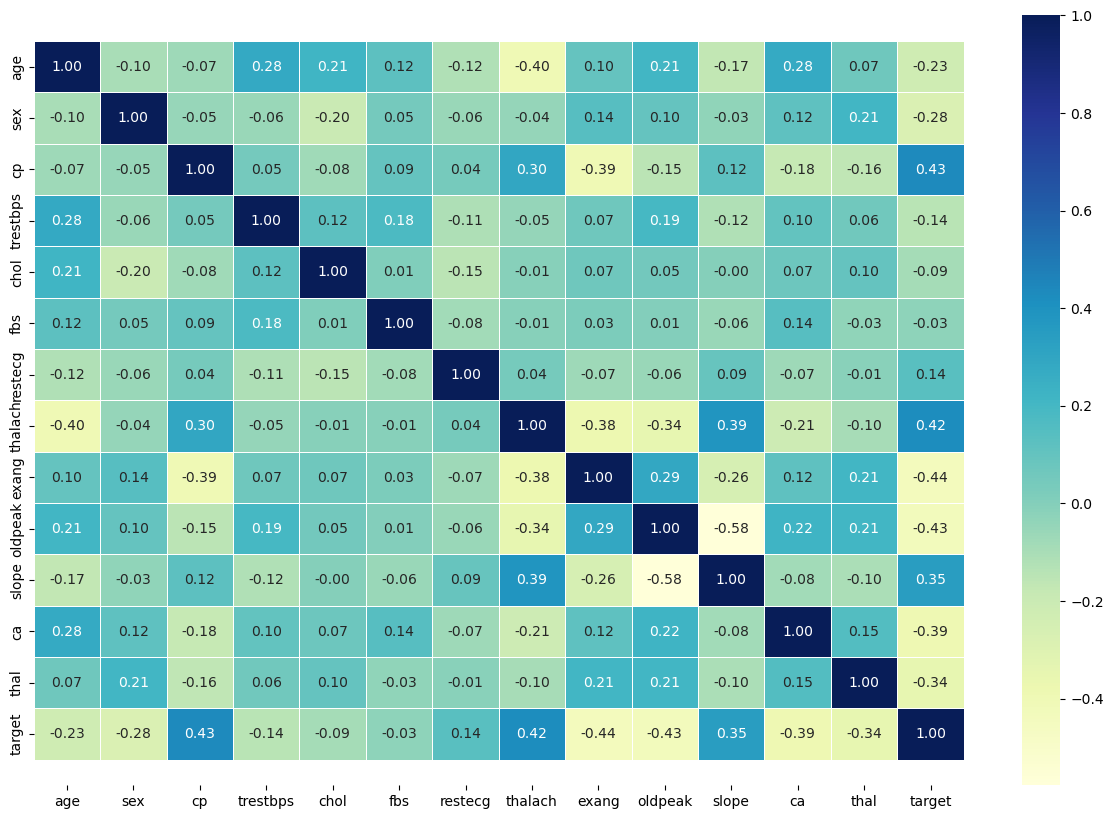

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt= '.2f',
                cmap = 'YlGnBu')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show();

## Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#splitting 
X = df.drop('target', axis=1)
y = df['target']

In [6]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

def fit_and_score(models, X_train ,X_test, y_train, y_test):
    '''
    Fits and evaluates Machine learning models
    '''
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                            X_train= X_train, 
                            X_test = X_test,
                            y_train= y_train,
                            y_test=y_test)

model_scores

C:\Users\vivek\Downloads\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

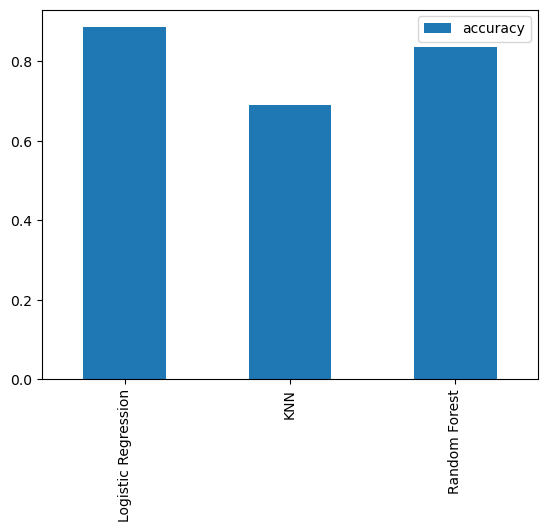

In [29]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.T.plot.bar()
plt.show();

## Tuning the models 

In [8]:
##hyperparameter tuning 
train_scores = []
test_scores = []

neighbors_range = range(1,21)

for i in neighbors_range: 
    knn = KNeighborsClassifier(n_neighbors = i)
    
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train,y_train))

    test_scores.append(knn.score(X_test, y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

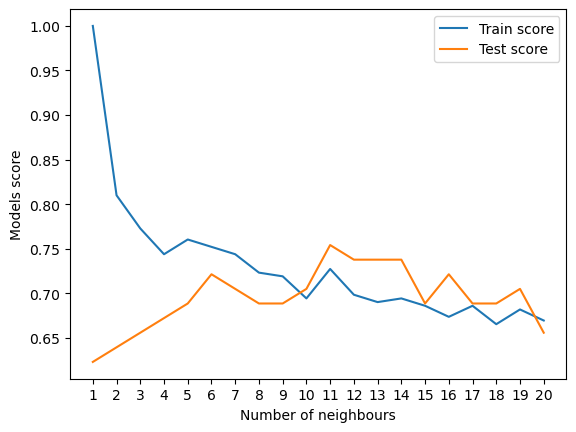

Maximum Knn score: 75.41%


In [10]:
plt.plot(neighbors_range, train_scores, label= 'Train score')
plt.plot(neighbors_range, test_scores, label= 'Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbours')
plt.ylabel('Models score')
plt.legend()
plt.show()

print(f'Maximum Knn score: {max(test_scores)*100:.2f}%')

## Using Randomized Search CV

In [8]:
#LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth':[None, 3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [9]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5, n_iter=20, verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [45]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [46]:
#RandomForest 
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5, n_iter=20, verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [48]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [49]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Using GridSearchCv

In [5]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver': ['liblinear']}

gs_log = GridSearchCV(LogisticRegression(),
                     param_grid=log_reg_grid,
                     cv=5, verbose=True)

gs_log.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [6]:
gs_log.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [7]:
gs_log.score(X_test, y_test)

0.8852459016393442

In [10]:
y_preds = gs_log.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

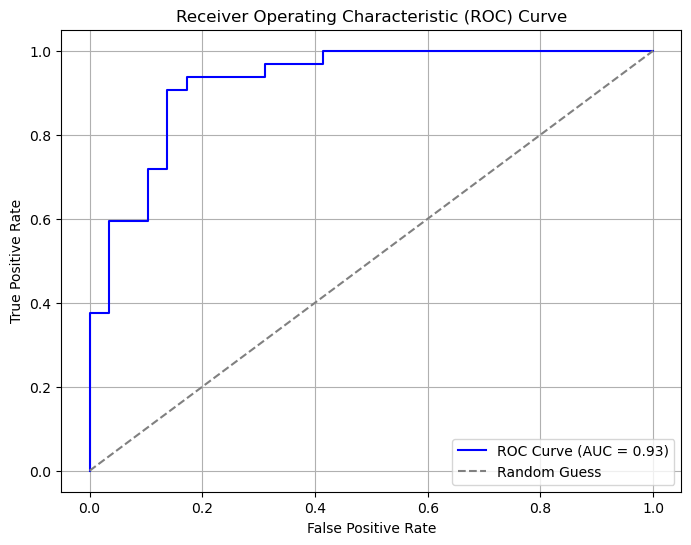

In [16]:
y_proba = gs_log.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [17]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


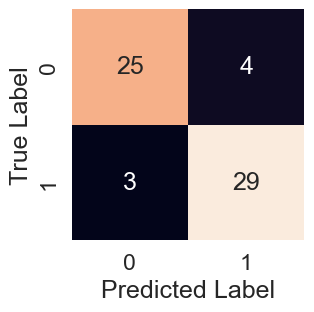

In [20]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a confusion matrix
    '''
    fig , ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True, cbar= False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
plt.show()
plot_conf_mat(y_test, y_preds)

In [21]:
##classification report 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Cross Validation

In [4]:
clf = LogisticRegression(C=0.20433597178569418, 
                        solver='liblinear')

In [8]:
cv_acc = cross_val_score(clf, X,y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [9]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [10]:
cv_precision = cross_val_score(clf, X,y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [11]:
cv_recall = cross_val_score(clf, X,y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [14]:
cv_f1 = cross_val_score(clf, X,y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

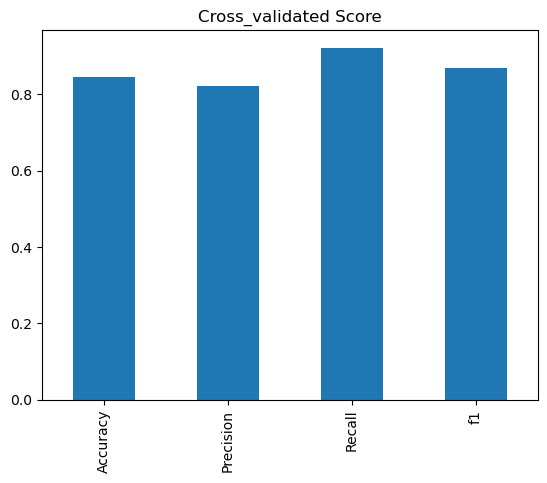

In [17]:
#Visualize
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall, 
                          'f1': cv_f1}, 
                         index=[0])
cv_metrics.T.plot.bar(title='Cross_validated Score', 
                     legend = False)
plt.show();

## Feature Importance

In [19]:
clf = LogisticRegression(C=0.20433597178569418, 
                        solver='liblinear') 
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [20]:
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [21]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.003167280425913024),
 'sex': np.float64(-0.8604465017405314),
 'cp': np.float64(0.6606704375815468),
 'trestbps': np.float64(-0.011569931400895204),
 'chol': np.float64(-0.0016637445504085657),
 'fbs': np.float64(0.04386110683275644),
 'restecg': np.float64(0.3127584216723769),
 'thalach': np.float64(0.024593614040407018),
 'exang': np.float64(-0.6041307979006147),
 'oldpeak': np.float64(-0.5686280785492623),
 'slope': np.float64(0.45051628777983527),
 'ca': np.float64(-0.6360989513753182),
 'thal': np.float64(-0.6766337783287578)}

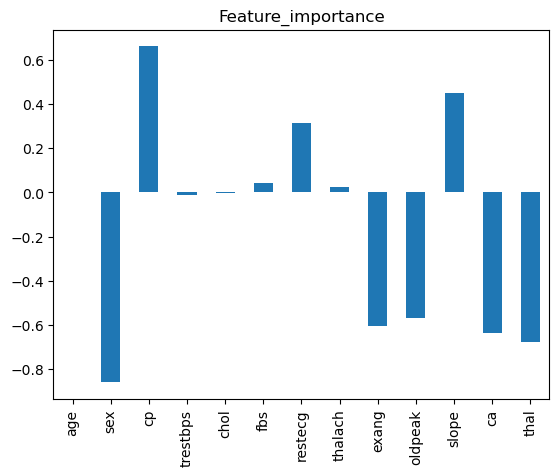

In [22]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature_importance', legend= False)
plt.show();

# Conclusion

In this project, I set out to predict the presence of heart disease using a dataset of clinical features. After importing and exploring the data, I examined patterns and imbalances in the target variable and visualized key features to better understand the distribution and relationships in the dataset.

I trained multiple machine learning models—including Logistic Regression and Random Forest—using `scikit-learn`, and evaluated them with standard classification metrics like accuracy, precision, recall, and ROC-AUC. These models helped identify patterns that could indicate a higher likelihood of heart disease.

Among the models tested, tree-based methods such as Logistic Regression generally offered the best performance, balancing accuracy and interpretability.Random Forest  also performed well and provided a strong baseline model with good generalization.

The project highlights how machine learning can be a valuable tool in predicting medical conditions like heart disease based on simple clinical measurements. With further tuning, more advanced models, or access to larger and more diverse datasets, prediction accuracy could be improved further—potentially aiding healthcare professionals in early detection and decision-making.